<a href="https://colab.research.google.com/github/kalyankalluri999/Disseration/blob/main/Disseration_Malaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, Lambda, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import cv2
import os

In [5]:
IMG_SIZE = 64
category = ['Uninfected', 'Parasitized']
def get_train_data(direct):
    data = []
    for labels in category:
        path = os.path.join(direct, labels)
        class_num = category.index(labels)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([new_array, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [6]:
new_data = get_train_data("/content/drive/MyDrive/Malaria/cell_images")

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app


In [7]:
X = []
y = []
for feature, label in new_data:
    X.append(feature)
    y.append(label)
from keras.utils import np_utils
y = np_utils.to_categorical(y, num_classes = 2)
X = np.array(X)
y = np.array(y)
X = X.reshape(-1, 64, 64, 3)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rescale = 1/255,
                                     zoom_range = 0.3,
                                     horizontal_flip = True,
                                     rotation_range = 30)

test_generator = ImageDataGenerator(rescale = 1/255)

train_generator = train_generator.flow(np.array(X_train),
                                       y_train,
                                       batch_size = 64,
                                       shuffle = False)

test_generator = test_generator.flow(np.array(X_test),
                                     y_test,
                                     batch_size = 64,
                                     shuffle = False)

In [10]:
vg19 = VGG19(input_shape=[IMG_SIZE, IMG_SIZE] + [3], weights="imagenet", include_top=False)

for layer in vg19.layers:
    layer.trainable = False

x = Flatten()(vg19.output)

prediction = Dense(len(category), activation="softmax")(x)

model = Model(inputs=vg19.input, outputs=prediction)

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

80150528/80134624 [==============================] - 1s 0us/step


In [11]:
history = model.fit_generator(train_generator,
                                   steps_per_epoch = len(X_train)/64,
                                   epochs = 50,
                                   shuffle = False,
                                   validation_data=test_generator, validation_steps=len(test_generator))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/50
301/301 [==============================] - 41s 96ms/step - loss: 0.3961 - accuracy: 0.8263 - val_loss: 0.3186 - val_accuracy: 0.8645
Epoch 2/50
301/301 [==============================] - 29s 95ms/step - loss: 0.3136 - accuracy: 0.8716 - val_loss: 0.2712 - val_accuracy: 0.9052
Epoch 3/50
301/301 [==============================] - 28s 93ms/step - loss: 0.3040 - accuracy: 0.8780 - val_loss: 0.2573 - val_accuracy: 0.9023
Epoch 4/50
301/301 [==============================] - 28s 94ms/step - loss: 0.2945 - accuracy: 0.8823 - val_loss: 0.2481 - val_accuracy: 0.9086
Epoch 5/50
301/301 [==============================] - 28s 94ms/step - loss: 0.2837 - accuracy: 0.8840 - val_loss: 0.2444 - val_accuracy: 0.9060
Epoch 6/50
301/301 [==============================] - 28s 94ms/step - loss: 0.2862 - accuracy: 0.8875 - val_loss: 0.2410 - val_accuracy: 0.9111
Epoch 7/50
301/301 [==============================] - 28s 93ms/step - loss: 0.2797 - accuracy: 0.8883 - val_loss: 0.2377 - val_accuracy:

In [12]:
model.evaluate_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.22921337187290192, 0.9171504378318787]

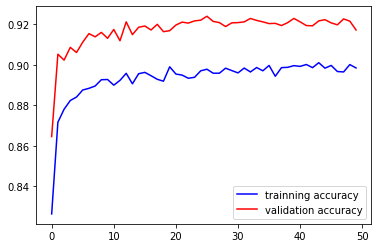

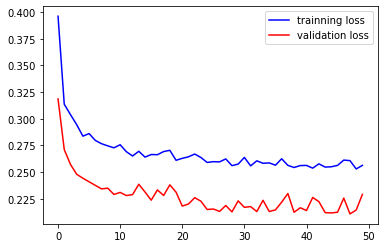

In [13]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [7]:
y_pred = model.predict(test_generator)
y_pred

NameError: ignored

In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

In [ ]:
model.save("new.model")

In [ ]:
import tensorflow as tf
category = ['Uninfected', 'Parasitized']
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model = tf.keras.models.load_model("new.model")

In [ ]:
prediction = model.predict([prepare("/content/drive/MyDrive/Malaria/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_25.png")])
if np.argmax(prediction) == 1:
    print("Infected")
else:
    print("Uninfected")

In [ ]:
prediction = model.predict([prepare("../input/prediction-images/Malaria-Parasite-Detection-Using-an-SVM-output-5-0 (2).png")])

if np.argmax(prediction) == 1:
    print("Infected")
else:
    print("Uninfected")

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=category))